In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Disaster Tweets

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.29 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.10 MB


# Exploring and preprocessing

In [ ]:
df_train["length"] = df_train["text"].apply(lambda x : len(x))
df_test["length"] = df_test["text"].apply(lambda x : len(x))

print("Train Length Stat")
print(df_train["length"].describe())
print()

print("Test Length Stat")
print(df_test["length"].describe())

Train Length Stat
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

Test Length Stat
count    3263.000000
mean      102.108183
std        33.972158
min         5.000000
25%        78.000000
50%       109.000000
75%       134.000000
max       151.000000
Name: length, dtype: float64


In [ ]:
df_train.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [ ]:
df_test.head()

,id,keyword,location,text,length
0,0,NaN,NaN,Just happened a terrible car crash,34
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45


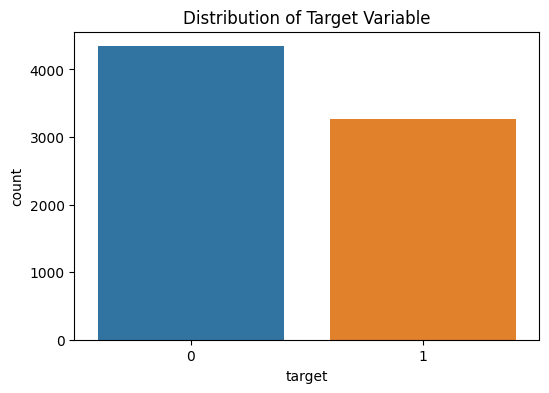

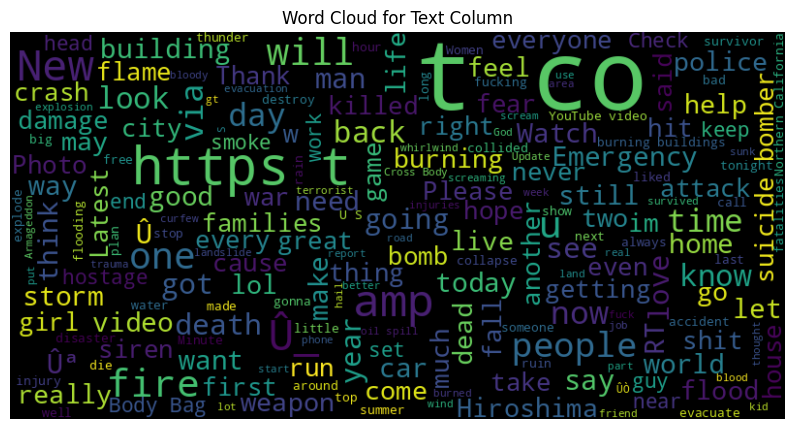

In [ ]:
# Distribution of the 'target' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_train)
plt.title('Distribution of Target Variable')
plt.show()

# Word cloud for the 'text' column
from wordcloud import WordCloud

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100).generate(' '.join(df_train['text'].astype(str)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Column')
plt.show()

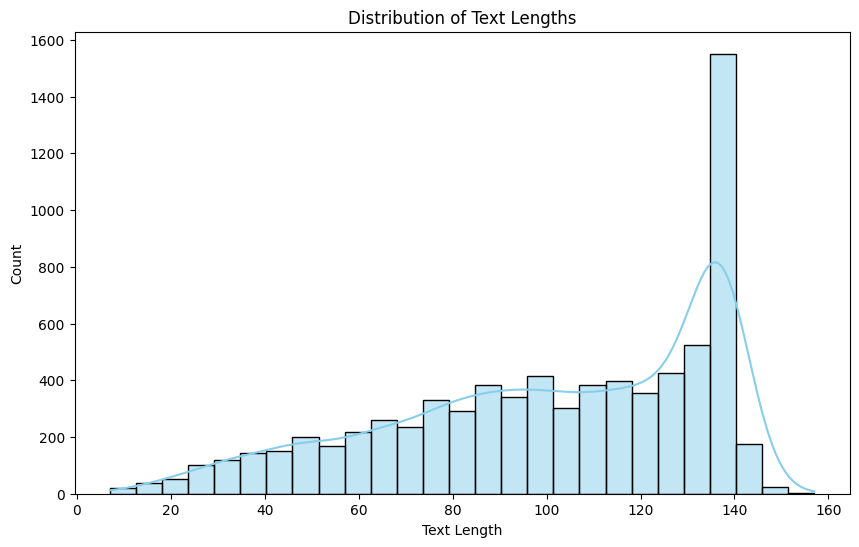

In [ ]:
# Distribution of text lengths
df_train['text_length'] = df_train['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_train['text_length'], kde=True, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

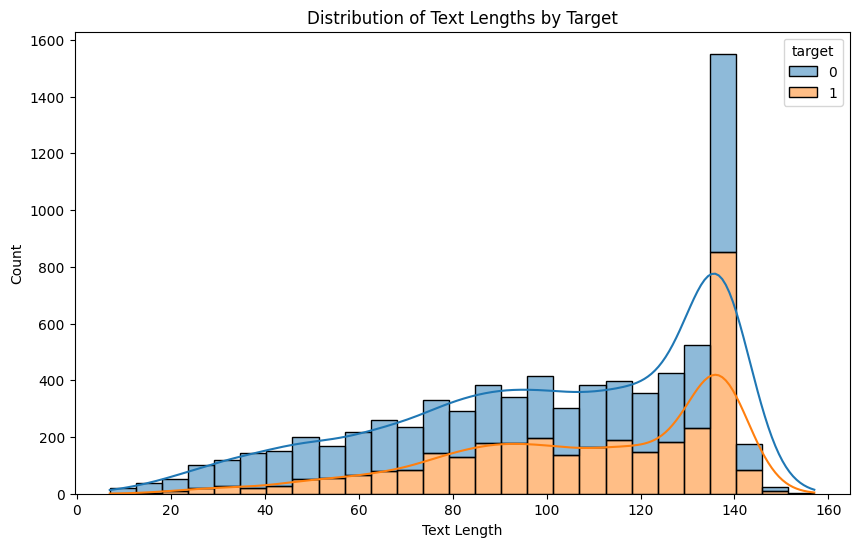

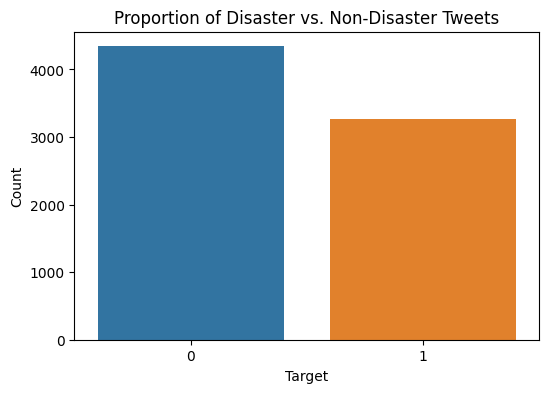

In [ ]:
# Distribution of text lengths by target
plt.figure(figsize=(10, 6))
sns.histplot(x='text_length', hue='target', data=df_train, kde=True, color='skyblue', multiple='stack')
plt.title('Distribution of Text Lengths by Target')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

# Proportion of disaster vs. non-disaster tweets
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_train)
plt.title('Proportion of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# pre processing

In [ ]:
#Removing html tags
import re
df_train['text']=df_train['text'].str.replace(re.compile('<.*?>'),'')
df_test['text']=df_test['text'].str.replace(re.compile('<.*?>'),'')

In [ ]:
#Removing Links
df_train['text']=df_train['text'].str.replace(re.compile('https?://\S+|www\.\S+'),'')
df_train['text']=df_train['text'].str.replace(re.compile('https?://\S+|www\.\S+'),'')

In [ ]:
#Removing Emojis
emojiSeq=re.compile("["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    u"\U0001F1E0-\U0001F1FF"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
df_train['text']=df_train['text'].str.replace(emojiSeq,'')
df_test['text']=df_test['text'].str.replace(emojiSeq,'')

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords resource
nltk.download('stopwords')

# Create a set of English stopwords
stopWords = set(stopwords.words('english'))

# Now you can continue with the rest of your code
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopWords]))
df_test['text'] = df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopWords]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string  # Import the string module

# Function to remove punctuation
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Apply the function to the 'text' column in both train and test DataFrames
df_train['text'] = df_train['text'].apply(lambda x: remove_punct(x))
df_test['text'] = df_test['text'].apply(lambda x: remove_punct(x))


In [ ]:
#Applying the snowball stemmer
from nltk.stem import SnowballStemmer
snowball=SnowballStemmer('english')
df_train['text']=df_train['text'].apply(lambda x: ' '.join([snowball.stem(word) for word in x.split()]))
df_test['text']=df_test['text'].apply(lambda x: ' '.join([snowball.stem(word) for word in x.split()]))

In [ ]:
#Exporting the dataset
df_train.to_csv('train Cleaned.csv',index=False)
df_test.to_csv('test Cleaned.csv',index=False)

In [ ]:
df_train["length"] = df_train["text"].apply(lambda x : len(x))
df_test["length"] = df_test["text"].apply(lambda x : len(x))

print("Train Length Stat")
print(df_train["length"].describe())
print()

print("Test Length Stat")
print(df_test["length"].describe())

Train Length Stat
count    7613.000000
mean       59.093524
std        22.797059
min         3.000000
25%        42.000000
50%        60.000000
75%        76.000000
max       128.000000
Name: length, dtype: float64

Test Length Stat
count    3263.000000
mean       71.476862
std        25.944252
min         2.000000
25%        54.000000
50%        74.000000
75%        93.000000
max       126.000000
Name: length, dtype: float64


In [ ]:
df_train.head()

,id,keyword,location,text,target,length,text_length
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1,41,69
1,4,NaN,NaN,forest fire near la rong sask canada,1,36,38
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1,69,133
3,6,NaN,NaN,13000 peopl receiv wildfir evacu order california,1,49,65
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1,52,88


In [ ]:
df_test.head()

,id,keyword,location,text,length
0,0,NaN,NaN,happen terribl car crash,24
1,2,NaN,NaN,heard earthquak differ citi stay safe everyon,45
2,3,NaN,NaN,forest fire spot pond gees flee across street ...,57
3,9,NaN,NaN,apocalyps light spokan wildfir,30
4,11,NaN,NaN,typhoon soudelor kill 28 china taiwan,37


# model building

In [ ]:
!pip install torch
!pip install transformers

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load the pre-trained DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Load the pre-trained DistilBERT model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Load and preprocess your data
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize and encode the input data
tokens = tokenizer.batch_encode_plus(
    df_train['text'].tolist(),
    truncation=True,
    padding=True,
    return_tensors='pt',
)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# Prepare the dataset
X_train, X_val, y_train, y_val = train_test_split(
    tokens['input_ids'],
    torch.tensor(df_train['target'].values),  # Convert to tensor
    test_size=0.2,
    random_state=42
)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)



In [ ]:
from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def train_and_evaluate(lr, num_epochs, batch_size):
    # Assuming you have train_dataset, val_dataset defined

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Load the pre-trained DistilBERT model for sequence classification
    trainer = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

    # Fine-tuning parameters
    optimizer = AdamW(trainer.parameters(), lr=lr)

    # Training loop
    for epoch in range(num_epochs):
        trainer.train()
        for batch in train_loader:
            input_ids, labels = batch
            optimizer.zero_grad()
            outputs = trainer(input_ids, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

        # Validation
        trainer.eval()
        all_preds = []
        with torch.no_grad():
            for batch in val_loader:
                input_ids, labels = batch
                outputs = trainer(input_ids)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1)
                all_preds.extend(preds.cpu().numpy())

        # Calculate accuracy on the validation set
        val_accuracy = accuracy_score(y_val, all_preds)
        print(f'Epoch {epoch + 1}/{num_epochs}, Validation Accuracy: {val_accuracy:.4f}')

        report = classification_report(y_val, all_preds)
        print(report)

        mat = confusion_matrix(y_val, all_preds)
        sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
        plt.xlabel('true target')
        plt.ylabel('predicted target')

    # Save the fine-tuned model
    trainer.save_pretrained(f'fine_tuned_distilbert_lr{lr}_epochs{num_epochs}_batch{batch_size}')

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Validation Accuracy: 0.7859
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       874
           1       0.74      0.78      0.76       649

    accuracy                           0.79      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Epoch 2/3, Validation Accuracy: 0.8096
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       874
           1       0.77      0.80      0.78       649

    accuracy                           0.81      1523
   macro avg       0.81      0.81      0.81      1523
weighted avg       0.81      0.81      0.81      1523

Epoch 3/3, Validation Accuracy: 0.7794
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       874
           1       0.71      0.81      0.76       649

    accuracy                           0.78      1523
   macro av

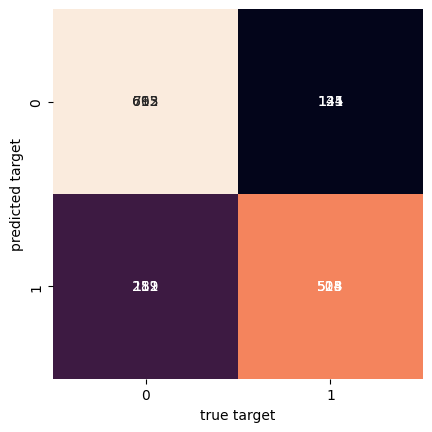

In [ ]:
#train_and_evaluate the fine-tuned model with lr=2e-5, num_epochs=3, batch_size=32:

train_and_evaluate(lr=2e-5, num_epochs=3, batch_size=32)

# Generate the target file

In [ ]:
target = pd.read_csv("target.csv")
target.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts

    def __len__(self):
        return len(self.tokenized_texts['input_ids'])

    def __getitem__(self, idx):
        return {
            'input_ids': self.tokenized_texts['input_ids'][idx],
            'attention_mask': self.tokenized_texts['attention_mask'][idx],
        }

In [ ]:

texts = df_test['text'].tolist()

tokenized_texts = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

test_dataset = MyDataset(tokenized_texts)  # Replace with the actual dataset class you used during training
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

trainer.eval()
all_preds = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        outputs = trainer(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())



In [ ]:
all_preds=np.round(all_preds).astype(int).reshape(3263)
tar=pd.DataFrame({'id':target['id'].values.tolist(),'target':all_preds})
tar.to_csv('target.csv',index=False)

In [ ]:
tar.describe()

,id,target
count,3263.000000,3263.000000
mean,5427.152927,0.443150
std,3146.427221,0.496834
min,0.000000,0.000000
25%,2683.000000,0.000000
50%,5500.000000,0.000000
75%,8176.000000,1.000000
max,10875.000000,1.000000


In [ ]:
tar.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [ ]:
tar[tar['target']==0].count()

id        1817
target    1817
dtype: int64

In [ ]:
tar[tar['target']==1].count()

id        1446
target    1446
dtype: int64

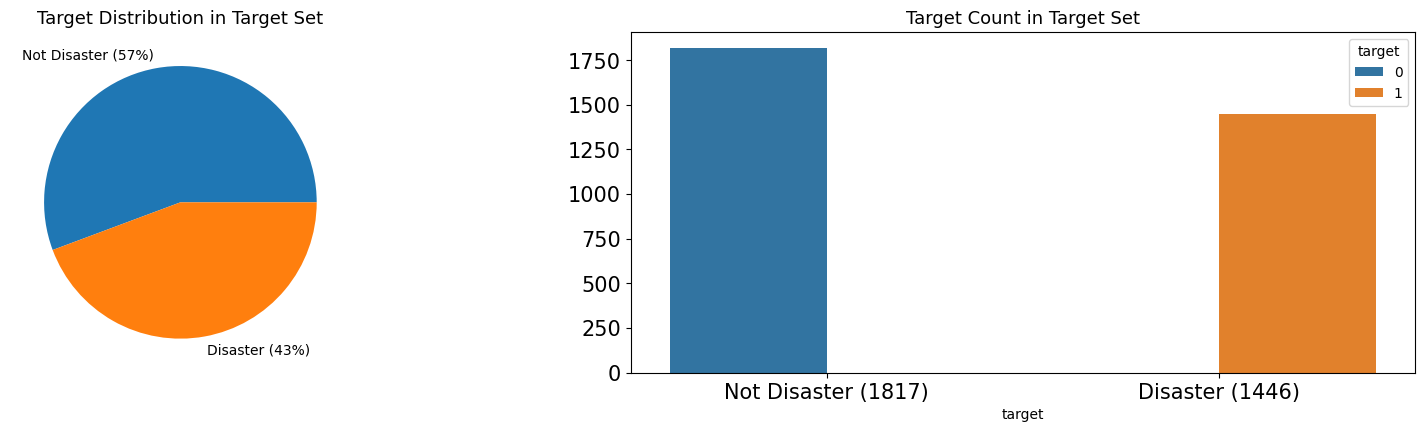

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

tar.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'])
sns.countplot(x=tar['target'], hue=tar['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster (1817)', 'Disaster (1446)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Target Set', fontsize=13)
axes[1].set_title('Target Count in Target Set', fontsize=13)

plt.show()

In [ ]:
tar.to_csv("Target.csv", index=False)